# Практика

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

### Сгенерируйте примеры из распределения

In [204]:
# ваш код тут
# например вот такое распределение https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cosine.html#scipy.stats.cosine

# возьмем распределение maxwell: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.maxwell.html#scipy.stats.maxwell
maxwell_rv = sts.maxwell()
sample = maxwell_rv.rvs(1000)
sample

array([1.19706274, 2.42401645, 1.16908914, 2.11399091, 1.57854688,
       0.90313352, 1.74217382, 0.57755656, 1.12380711, 0.94111762,
       1.01398103, 1.96258498, 2.46445979, 0.92847076, 2.60713091,
       0.90695901, 1.06071395, 1.30112081, 2.28342214, 1.6721712 ,
       1.3630383 , 2.00384508, 0.97290416, 0.92166221, 3.21838153,
       1.46661693, 3.63245678, 1.06869855, 1.4934239 , 2.11779357,
       0.26286772, 2.45591805, 1.45760591, 1.06768095, 2.47850397,
       0.86904368, 1.98350076, 1.59669788, 0.76615889, 1.33301252,
       1.66372807, 1.02612698, 2.51490213, 1.5724835 , 2.2470529 ,
       1.03536642, 1.20140274, 1.79730252, 1.5344338 , 1.66893153,
       0.81175993, 0.81246093, 2.65893908, 2.95822661, 0.92577642,
       2.36941568, 1.14587828, 1.46429602, 1.21180633, 1.22880042,
       0.41363046, 2.1783867 , 3.16378547, 1.55516885, 2.20979399,
       1.19681219, 1.97760422, 2.16757171, 3.22204287, 0.6952503 ,
       1.46020825, 2.02144795, 1.55629599, 1.65997629, 1.63009

In [205]:
sample.dtype

dtype('float64')

In [206]:
real_mean = maxwell_rv.mean() # настоящее среднее случайной величины
real_mean

1.5957691216057308

In [207]:
real_var = maxwell_rv.var() # настоящая дисперсия случайной величины
real_var

0.45352091052967447

### Постройте гистограмму выборки и теоретическую плотность распределения

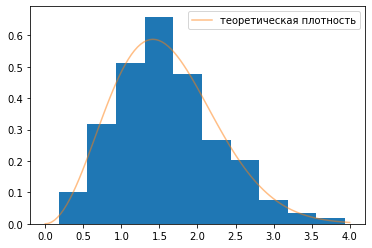

In [208]:
# ваш код тут
plt.hist(sample, density=True)
x = np.linspace(0,4,100)
pdf = maxwell_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.legend()

In [209]:
sample_mean = sample.mean() # выборочное среднее
sample_var = sample.var() # выборочная дисперсия
sample_mean, sample_var

(1.6010412990257579, 0.4429053016718685)

### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

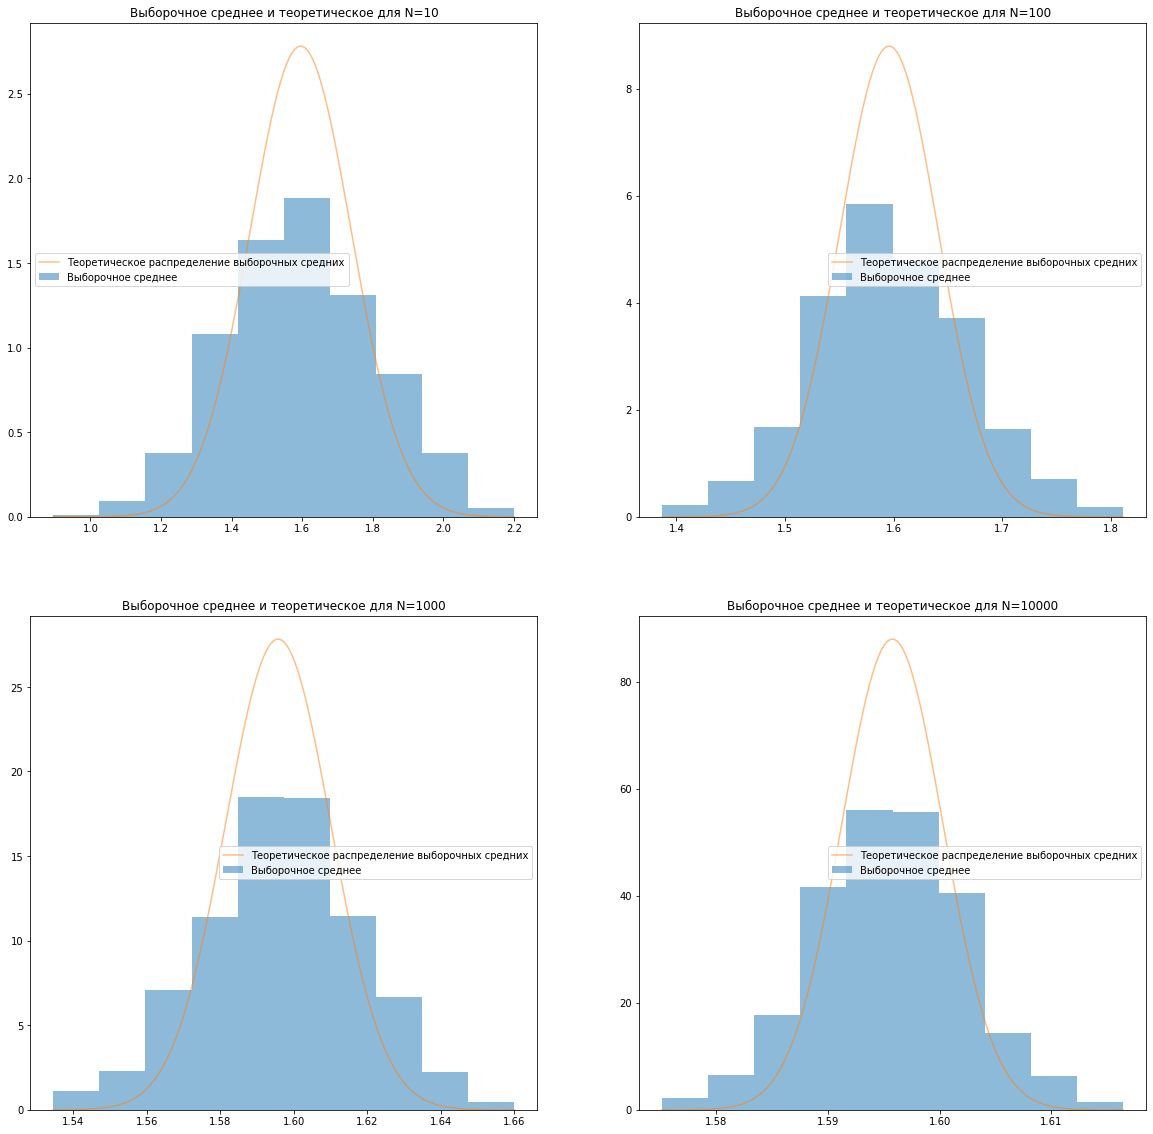

In [215]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2) 

fig.set_size_inches(20, 20)
# сгенерируем много выборочных средних
for N, ax in zip([10, 100, 1000, 10000], [ax1, ax2, ax3, ax4]):
    means = []
    for i in range(1000):
         means.append(np.mean(maxwell_rv.rvs(N)))
    ax.hist(means, density=True, alpha=0.5)
    
    # теоретическое распределение выборочных средних по цпт
    norm_rv = sts.norm(loc=maxwell_rv.mean(), scale=maxwell_rv.var() / np.sqrt(N))
    x = np.linspace(min(means), max(means), 1000)
    pdf = norm_rv.pdf(x)
    ax.plot(x, pdf, alpha=0.5)
    ax.set_title(f'Выборочное среднее и теоретическое для N={N}')
    ax.legend(["Теоретическое распределение выборочных средних", "Выборочное среднее"])
    
plt.show()

Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо?
**Ваш ответ:**

In [9]:
# Если взглянуть на гистограмму, то можно увидеть, что аппроксимация распределения выборочного среднего по ЦПТ maxwell работает, хоть и не совсем точно

## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел). 

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций 
`from statsmodels.stats.weightstats import _zconfint_generic`. Сравните результаты.


Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [216]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8')

In [217]:
df.columns = df.columns.str.replace(' ', '_')
df.describe()

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


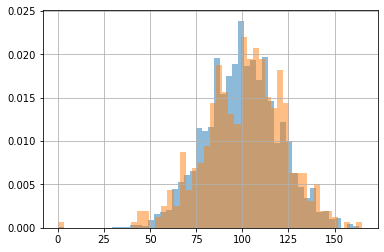

In [218]:
df.groupby('churn')['total_day_calls'].hist(density=True, alpha=0.5, bins=50);

In [224]:
from functools import partial
grouped_df = df.groupby('churn').agg({'total_day_calls': [partial(np.std, ddof=1), 'mean', 'count']})
grouped_df

total_day_calls                  
                  std        mean count
churn                                  
False       19.801157  100.283158  2850
True        21.582307  101.335404   483

In [264]:
def calc_confidence_interval(row):
    row = row.total_day_calls
    s = 2 * row['std'] / np.sqrt(row['count'])
    return row['mean'] - s, row['mean'] + s

df_ = grouped_df['total_day_calls']
grouped_df['confidence_interval'] = grouped_df.apply(calc_confidence_interval, axis=1)
grouped_df

total_day_calls                    \
                  std        mean count   
churn                                     
False       19.801157  100.283158  2850   
True        21.582307  101.335404   483   

                           confidence_interval  \
                                                 
churn                                            
False  (99.54133858857833, 101.02497720089536)   
True    (99.37134576363385, 103.2994616897823)   

                              _zconfint_generic  
                                                 
churn                                            
False    (99.04149114274126, 99.98204678079553)  
True   (101.52482464673243, 102.68876067262063)

In [265]:
from statsmodels.stats.weightstats import _zconfint_generic

In [278]:
confid_zconf_0 = _zconfint_generic(mean=df_['mean'].iloc[0], std_mean=df_['std'].iloc[0], alpha=0.95, alternative='two-sided')

In [279]:
confid_zconf_1 = _zconfint_generic(mean=df_['mean'].iloc[1], std_mean=df_['std'].iloc[1], alpha=0.95, alternative='two-sided')

In [280]:
grouped_df['_zconfint_generic'] = [confid_zconf_0, confid_zconf_1]

In [281]:
grouped_df

total_day_calls                    \
                  std        mean count   
churn                                     
False       19.801157  100.283158  2850   
True        21.582307  101.335404   483   

                           confidence_interval  \
                                                 
churn                                            
False  (99.54133858857833, 101.02497720089536)   
True    (99.37134576363385, 103.2994616897823)   

                             _zconfint_generic  
                                                
churn                                           
False  (99.04149114274126, 101.52482464673243)  
True   (99.98204678079553, 102.68876067262063)